<a href="https://colab.research.google.com/github/Andrei198203/Data_Science_HW11/blob/main/HW11_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading and preparing data

In [3]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing import sequence

In [ ]:
# Завантаження датасету IMDB
max_features = 10000  # Кількість найчастіших слів
maxlen = 500  # Максимальна довжина рецензії

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
# Паддинг рецензій до однакової довжини
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

Basic RNN model

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
import matplotlib.pyplot as plt

model_rnn = Sequential()
model_rnn.add(Embedding(max_features, 128, input_length=maxlen))
model_rnn.add(SimpleRNN(128))
model_rnn.add(Dense(1, activation='sigmoid'))

model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("Training RNN model...")
history_rnn = model_rnn.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)


Training RNN model...
Epoch 1/5
625/625 [==============================] - 146s 232ms/step - loss: 0.6423 - accuracy: 0.6111 - val_loss: 0.6623 - val_accuracy: 0.5800
Epoch 2/5
625/625 [==============================] - 145s 232ms/step - loss: 0.5430 - accuracy: 0.7253 - val_loss: 0.7175 - val_accuracy: 0.5168
Epoch 3/5
625/625 [==============================] - 146s 233ms/step - loss: 0.4668 - accuracy: 0.7817 - val_loss: 0.4961 - val_accuracy: 0.7714
Epoch 4/5
625/625 [==============================] - 140s 224ms/step - loss: 0.3998 - accuracy: 0.8238 - val_loss: 0.5567 - val_accuracy: 0.7652
Epoch 5/5
625/625 [==============================] - 140s 224ms/step - loss: 0.3830 - accuracy: 0.8361 - val_loss: 0.5619 - val_accuracy: 0.7838


In [ ]:
# Оцінка моделі на тестових даних
score_rnn = model_rnn.evaluate(x_test, y_test, verbose=0)
print(f"RNN Test accuracy: {score_rnn[1]:.4f}, Test loss: {score_rnn[0]:.4f}")

RNN Test accuracy: 0.7819, Test loss: 0.5534


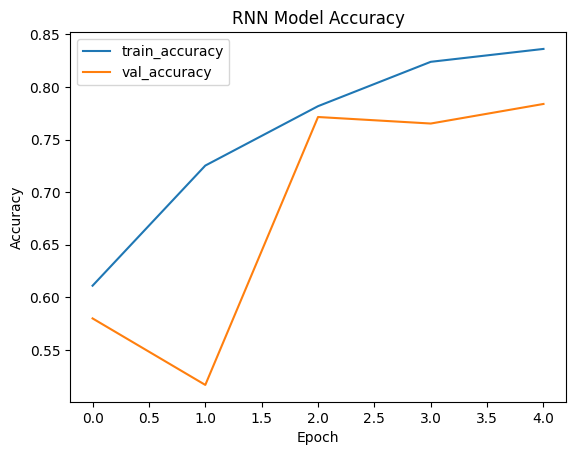

In [ ]:
# Графік навчання
plt.plot(history_rnn.history['accuracy'], label='train_accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='val_accuracy')
plt.title('RNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

Model with LSTM

In [ ]:
from keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(Embedding(max_features, 128, input_length=maxlen))
model_lstm.add(LSTM(128))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("Training LSTM model...")
history_lstm = model_lstm.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Training LSTM model...
Epoch 1/5
625/625 [==============================] - 574s 915ms/step - loss: 0.4567 - accuracy: 0.7871 - val_loss: 0.3586 - val_accuracy: 0.8454
Epoch 2/5
625/625 [==============================] - 559s 895ms/step - loss: 0.3025 - accuracy: 0.8794 - val_loss: 0.4452 - val_accuracy: 0.8194
Epoch 3/5
625/625 [==============================] - 559s 895ms/step - loss: 0.2073 - accuracy: 0.9222 - val_loss: 0.3581 - val_accuracy: 0.8676
Epoch 4/5
625/625 [==============================] - 556s 889ms/step - loss: 0.1481 - accuracy: 0.9462 - val_loss: 0.4092 - val_accuracy: 0.8532
Epoch 5/5
625/625 [==============================] - 562s 900ms/step - loss: 0.1323 - accuracy: 0.9506 - val_loss: 0.4424 - val_accuracy: 0.8398


In [ ]:
# Оцінка моделі на тестових даних
score_lstm = model_lstm.evaluate(x_test, y_test, verbose=0)
print(f"LSTM Test accuracy: {score_lstm[1]:.4f}, Test loss: {score_lstm[0]:.4f}")

LSTM Test accuracy: 0.8304, Test loss: 0.4603


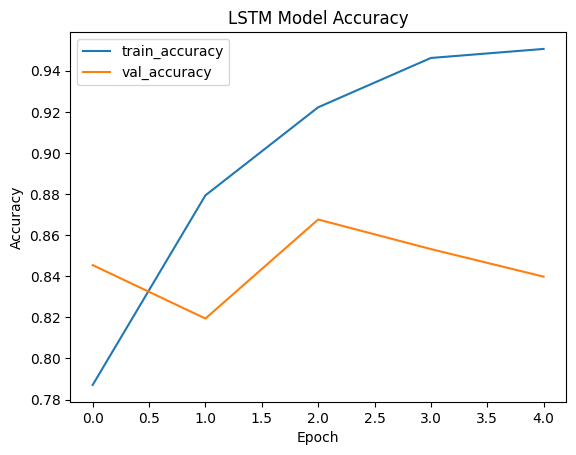

In [ ]:
# Графік навчання
plt.plot(history_lstm.history['accuracy'], label='train_accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='val_accuracy')
plt.title('LSTM Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

Two-way (bidirectional, bilateral)
 model with LSTM

In [12]:
from keras.layers import Bidirectional

model_bilstm = Sequential()
model_bilstm.add(Embedding(max_features, 128, input_length=maxlen))
model_bilstm.add(Bidirectional(LSTM(128)))
model_bilstm.add(Dense(1, activation='sigmoid'))

model_bilstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("Training Bidirectional LSTM model...")
history_bilstm = model_bilstm.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Training Bidirectional LSTM model...
Epoch 1/10
625/625 [==============================] - 958s 2s/step - loss: 0.4608 - accuracy: 0.7743 - val_loss: 0.3540 - val_accuracy: 0.8496
Epoch 2/10
625/625 [==============================] - 963s 2s/step - loss: 0.3396 - accuracy: 0.8587 - val_loss: 0.3651 - val_accuracy: 0.8486
Epoch 3/10
625/625 [==============================] - 962s 2s/step - loss: 0.2307 - accuracy: 0.9124 - val_loss: 0.3241 - val_accuracy: 0.8704
Epoch 4/10
625/625 [==============================] - 961s 2s/step - loss: 0.1702 - accuracy: 0.9371 - val_loss: 0.3468 - val_accuracy: 0.8700
Epoch 5/10
625/625 [==============================] - 945s 2s/step - loss: 0.1457 - accuracy: 0.9457 - val_loss: 0.4140 - val_accuracy: 0.8452
Epoch 6/10
625/625 [==============================] - 962s 2s/step - loss: 0.2290 - accuracy: 0.9054 - val_loss: 0.3678 - val_accuracy: 0.8592
Epoch 7/10
625/625 [==============================] - 964s 2s/step - loss: 0.1020 - accuracy: 0.9636 - va

In [15]:
# Оцінка моделі на тестових даних
score_bilstm = model_bilstm.evaluate(x_test, y_test, verbose=0)
print(f"Bidirectional LSTM Test accuracy: {score_bilstm[1]:.4f}, Test loss: {score_bilstm[0]:.4f}")

Bidirectional LSTM Test accuracy: 0.8572, Test loss: 0.7451


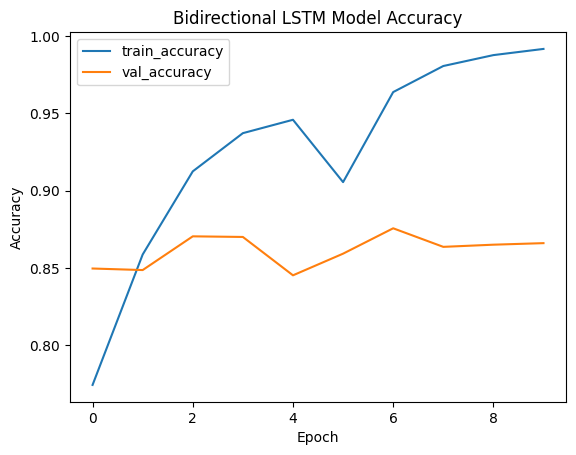

In [16]:
# Графік навчання
plt.plot(history_bilstm.history['accuracy'], label='train_accuracy')
plt.plot(history_bilstm.history['val_accuracy'], label='val_accuracy')
plt.title('Bidirectional LSTM Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

Deep learning model with LSTM

In [4]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
import matplotlib.pyplot as plt

import numpy as np
from keras.datasets import imdb
from keras.preprocessing import sequence

from keras.layers import LSTM



In [9]:
# Завантаження датасету IMDB
max_features = 10000  # Кількість найчастіших слів
maxlen = 500  # Максимальна довжина рецензії

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 [==============================] - 0s 0us/step


In [10]:
# Паддинг рецензій до однакової довжини
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [11]:
model_deep_lstm = Sequential()
model_deep_lstm.add(Embedding(max_features, 128, input_length=maxlen))
model_deep_lstm.add(LSTM(128, return_sequences=True))
model_deep_lstm.add(LSTM(128))
model_deep_lstm.add(Dense(1, activation='sigmoid'))

model_deep_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("Training Deep LSTM model...")
history_deep_lstm = model_deep_lstm.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Training Deep LSTM model...
Epoch 1/5
625/625 [==============================] - 1020s 2s/step - loss: 0.6064 - accuracy: 0.6521 - val_loss: 0.9033 - val_accuracy: 0.5124
Epoch 2/5
625/625 [==============================] - 1006s 2s/step - loss: 0.4816 - accuracy: 0.7707 - val_loss: 0.5372 - val_accuracy: 0.7330
Epoch 3/5
625/625 [==============================] - 1058s 2s/step - loss: 0.3809 - accuracy: 0.8324 - val_loss: 0.3032 - val_accuracy: 0.8730
Epoch 4/5
625/625 [==============================] - 1033s 2s/step - loss: 0.2153 - accuracy: 0.9169 - val_loss: 0.2920 - val_accuracy: 0.8896
Epoch 5/5
625/625 [==============================] - 1002s 2s/step - loss: 0.1552 - accuracy: 0.9444 - val_loss: 0.3747 - val_accuracy: 0.8684


In [13]:
# Оцінка моделі на тестових даних
score_deep_lstm = model_deep_lstm.evaluate(x_test, y_test, verbose=0)
print(f"Deep LSTM Test accuracy: {score_deep_lstm[1]:.4f}, Test loss: {score_deep_lstm[0]:.4f}")

Deep LSTM Test accuracy: 0.8570, Test loss: 0.3962


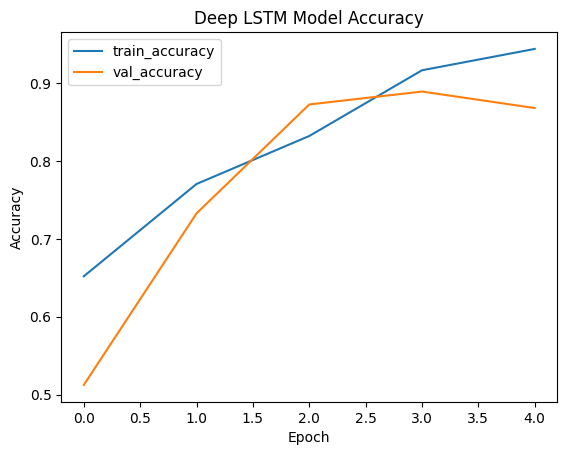

In [14]:
# Графік навчання
plt.plot(history_deep_lstm.history['accuracy'], label='train_accuracy')
plt.plot(history_deep_lstm.history['val_accuracy'], label='val_accuracy')
plt.title('Deep LSTM Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

Conclusion

As we see the result of test accuracy in HW11 is a little bit lower than in HW9. The best result of accuracy among models in HW11 is shown by two-way (bidirectional, bilateral) model with LSTM. The greater the number of epochs, the worse index of the loss function is obtained by two-way (bidirectional, bilateral) model with LSTM in val_accuracy. But train_accuracy is becoming higher with number epochs growth.